In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras

now to define the path ( to swtich it between jupyter notebook & kaggle kernel)

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 97% 336M/346M [00:03<00:00, 76.1MB/s]
100% 346M/346M [00:07<00:00, 51.7MB/s]


In [4]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [5]:
testpath = r'/content/seg_test/seg_test'
trainpath = r'/content/seg_train/seg_train'

# Open Folders

now let's first check the Train folder to have a look to its content

In [6]:
os.listdir(trainpath)

['mountain', 'forest', 'street', 'buildings', 'sea', 'glacier']

In [7]:
import os
import glob as gb

for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str(os.path.join(trainpath, folder)) + '/*.jpg')
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2512 in folder mountain
For training data , found 2271 in folder forest
For training data , found 2382 in folder street
For training data , found 2191 in folder buildings
For training data , found 2274 in folder sea
For training data , found 2404 in folder glacier


ok , how about the test folder

In [8]:
for folder in  os.listdir(testpath) :
    files = gb.glob(pathname= str(os.path.join(testpath, folder)) + '/*.jpg')
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 525 in folder mountain
For training data , found 474 in folder forest
For training data , found 501 in folder street
For training data , found 437 in folder buildings
For training data , found 510 in folder sea
For training data , found 553 in folder glacier


_____

# Checking Images

now we need to heck the images sizes , to know ow they looks like

since we have 6 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

now how about the images sizes in train folder

In [9]:
size = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str(os.path.join(trainpath, folder)) + '/*.jpg')
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(143, 150, 3)        2
(123, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(108, 150, 3)        2
(142, 150, 3)        2
(136, 150, 3)        2
(100, 150, 3)        1
(76, 150, 3)         1
(145, 150, 3)        1
(110, 150, 3)        1
(149, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(105, 150, 3)        1
(97, 150, 3)         1
(115, 150, 3)        1
(140, 150, 3)        1
(124, 150, 3)        1
(133, 150, 3)        1
(131, 150, 3)        1
(147, 150, 3)        1
(103, 150, 3)        1
(81, 150, 3)         1
(141, 150, 3)        1
(120, 150, 3)        1
Name: count, dtype: int64

______

ok , almost all of them are 150,150,3 , how about test images ?

In [10]:
size = []
for folder in  os.listdir(testpath) :
    files = gb.glob(pathname= str(os.path.join(testpath, folder)) + '/*.jpg')
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(81, 150, 3)        1
(131, 150, 3)       1
(141, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(110, 150, 3)       1
(72, 150, 3)        1
Name: count, dtype: int64

# Image data generator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen= ImageDataGenerator(rescale=1/255, rotation_range= 30, horizontal_flip= True, vertical_flip=True)
test_gen= ImageDataGenerator(rescale=1/255)

train_generator= train_gen.flow_from_directory(trainpath, target_size=(150,150), batch_size=1, class_mode='categorical')
test_generator= test_gen.flow_from_directory(testpath, target_size=(150,150), batch_size=32, class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [12]:
train_generator.next()

(array([[[[0.9921569 , 0.9921569 , 0.9843138 ],
          [0.995405  , 0.995405  , 0.9875619 ],
          [1.        , 1.        , 0.9921569 ],
          ...,
          [0.2929454 , 0.25664958, 0.17921992],
          [0.34800416, 0.31663162, 0.2342787 ],
          [0.4358848 , 0.40451226, 0.32215932]],
 
         [[0.9921569 , 0.9921569 , 0.9843138 ],
          [0.9921569 , 0.9921569 , 0.9843138 ],
          [0.99855965, 0.99855965, 0.9907165 ],
          ...,
          [0.4221376 , 0.39076504, 0.3084121 ],
          [0.5100182 , 0.47864565, 0.39629272],
          [0.5264408 , 0.48857206, 0.41758746]],
 
         [[0.9921569 , 0.9921569 , 0.9843138 ],
          [0.9921569 , 0.9921569 , 0.9843138 ],
          [0.99482006, 0.99482006, 0.98697686],
          ...,
          [0.5255633 , 0.48886454, 0.4158325 ],
          [0.5311727 , 0.48699474, 0.42705128],
          [0.54942757, 0.50236875, 0.44746676]],
 
         ...,
 
         [[0.27342513, 0.27802348, 0.2768739 ],
          [0.28691

ok , since almost all of pictures are 150,150,3 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

# Reading Images

now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily

let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [13]:
code= {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
def get_code(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [14]:
s = 150

In [15]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str(os.path.join(trainpath, folder)) + '/*.jpg')
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

now to read all pictues in six categories in training folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function

great , now how many items in X_train

In [17]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


also we have have a look to random pictures in X_train , and to adjust their title using the y value

NameError: name 'getcode' is not defined

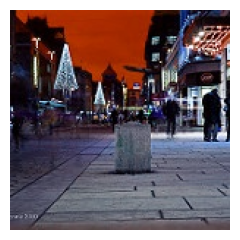

In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

great , now to repeat same steps exactly in test data

In [19]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) :
    files = gb.glob(pathname= str(os.path.join(testpath, folder)) + '/*.jpg')
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])


In [20]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


NameError: name 'getcode' is not defined

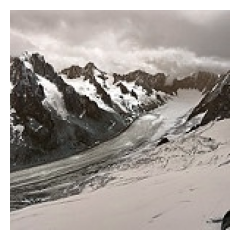

In [21]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

________

# Building The Model

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 150, 150, 3)
X_test shape  is (3000, 150, 150, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [23]:
y_train_categorical= keras.utils.to_categorical(y_train, 6)

In [24]:
y_train

array([3, 3, 3, ..., 2, 2, 2])

In [25]:
y_train_categorical

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [26]:
y_test_categorical= keras.utils.to_categorical(y_test, 6)

now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [29]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,
        keras.layers.Dense(120,activation='relu') ,
        keras.layers.Dense(100,activation='relu') ,
        keras.layers.Dense(50,activation='relu') ,
        keras.layers.Dropout(rate=0.5) ,
        keras.layers.Dense(6,activation='softmax') ,
        ])

now to compile the model , using adam optimizer , & categorical crossentropy loss

In [30]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

so how the model looks like ?

In [31]:
print('Model Details are : ')
KerasModel.summary()

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 150)     270150    
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 36, 150)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 50)        36050     
                                   

now to train the model , lets use 50 epochs now

In [32]:
epochs = 2
ThisModel = KerasModel.fit(X_train, y_train_categorical, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/2
220/220 [==============================] - 122s 436ms/step - loss: 1.7237 - accuracy: 0.3083
Epoch 2/2
220/220 [==============================] - 92s 417ms/step - loss: 1.1192 - accuracy: 0.5524


how is the final loss & accuracy


In [33]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test_categorical)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 11s 89ms/step - loss: 0.8963 - accuracy: 0.6260
Test Loss is 0.8963469862937927
Test Accuracy is 0.6259999871253967



_______

now to predict X test

In [34]:
y_pred = KerasModel.predict(X_test[:128])

print('Prediction Shape is {}'.format(y_pred.shape))

4/4 [==============================] - 0s 61ms/step
Prediction Shape is (128, 6)


In [39]:
get_code(np.argmax(y_pred[0]))

'mountain'

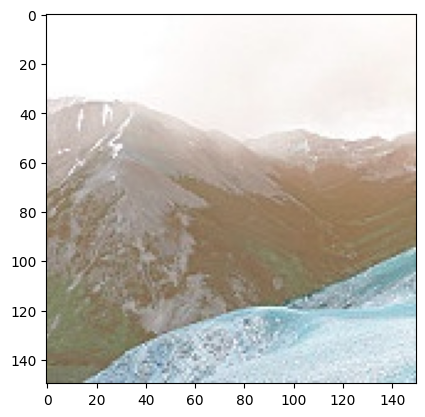

In [41]:
plt.imshow(X_test[0])

# Fit on image generator

In [49]:
KerasModel.fit(train_generator, epochs=1)

439/439 [==============================] - 120s 257ms/step - loss: 1.2873 - accuracy: 0.4493


# Transfer learning

In [27]:
X_train.shape

(14034, 150, 150, 3)

In [28]:
from tensorflow.keras.applications import ResNet50
ResNet= ResNet50(include_top=False,weights='imagenet',input_shape=(150,150,3))
ResNet.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                      

# As a feature extractor

In [29]:
# make layers non-trainable
for layer in ResNet.layers:
    layer.trainable = False

In [30]:
resnet_out= ResNet.output
flatten_out= keras.layers.Flatten()(resnet_out)
dense_out= keras.layers.Dense(128,activation='relu')(flatten_out)
output_layer= keras.layers.Dense(6,activation='softmax')(dense_out)

model= keras.Model(inputs=ResNet.input, outputs=output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [32]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(X_train[:100], y_train_categorical[:100], epochs= 1)

4/4 [==============================] - 8s 296ms/step - loss: 1.1555 - accuracy: 0.6800


# fine tuning

In [34]:
ResNet1= ResNet50(include_top=False,weights='imagenet',input_shape=(150,150,3))

In [35]:
for layer in ResNet1.layers[:-10]:
  layer.trainable= False

In [36]:
resnet_out1= ResNet1.output
flatten_out1= keras.layers.Flatten()(resnet_out1)
dense_out1= keras.layers.Dense(128,activation='relu')(flatten_out1)
output_layer1= keras.layers.Dense(6,activation='softmax')(dense_out1)

model1= keras.Model(inputs=ResNet1.input, outputs=output_layer1)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [38]:
model1.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model1.fit(X_train[:100], y_train_categorical[:100], validation_data= (X_test, y_test_categorical), epochs=2,
           callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True), ModelCheckpoint('./checkpoint_model{epoch}.keras')])

Epoch 1/2
4/4 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1689.5697 - val_accuracy: 0.1750
Epoch 2/2
4/4 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1631.2322 - val_accuracy: 0.1750


In [41]:
model1.save('full_model.keras')
model1.save_weights('only_weights.keras')

In [43]:
from tensorflow.keras.models import load_model

m1= load_model('full_model.keras')

In [44]:
m1.predict(X_test[:1])

1/1 [==============================] - 2s 2s/step


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

In [45]:
resnet_out1= ResNet1.output
flatten_out1= keras.layers.Flatten()(resnet_out1)
dense_out1= keras.layers.Dense(128,activation='relu')(flatten_out1)
output_layer1= keras.layers.Dense(6,activation='softmax')(dense_out1)

model2= keras.Model(inputs=ResNet1.input, outputs=output_layer1)

In [46]:
model2.load_weights('only_weights.keras')

In [47]:
model2.predict(X_test[:1])

1/1 [==============================] - 1s 1s/step


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)